In [1]:
from bs4 import BeautifulSoup

In [1]:
#Importing major libraries

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing CSV file 

df = pd.read_csv('Black_Friday.csv')

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
#Finding null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
#Cheching missing values

df.isnull().sum().sum()

556885

In [8]:
#Chechking unique values

df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [9]:
#converting Male = 1 and Female = 0

df.Gender.replace('M',1,inplace= True)
df.Gender.replace('F',0,inplace= True)

In [10]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365


In [11]:
#Median of Product_Category_2

df.Product_Category_2.median()

9.0

In [12]:
#Median of Product_Category_3

df.Product_Category_3.median()

14.0

In [13]:
df.Product_Category_2 = df.Product_Category_2.fillna(df.Product_Category_2.median())
df.Product_Category_3 = df.Product_Category_3.fillna(df.Product_Category_3.median())

In [14]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


<Axes: xlabel='Purchase', ylabel='Density'>

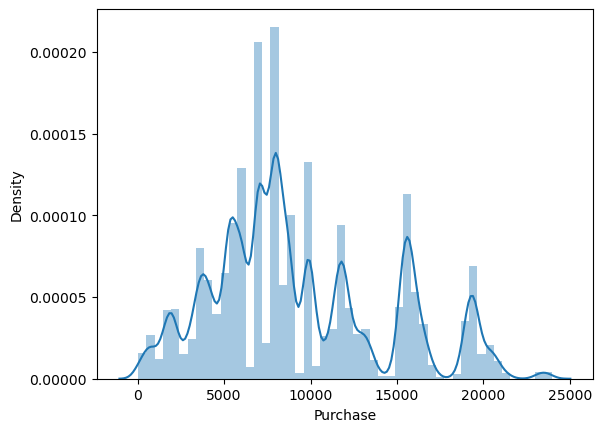

In [16]:
#Distribution Plot for Purchase

sns.distplot(df.Purchase)

<Axes: xlabel='Purchase', ylabel='Density'>

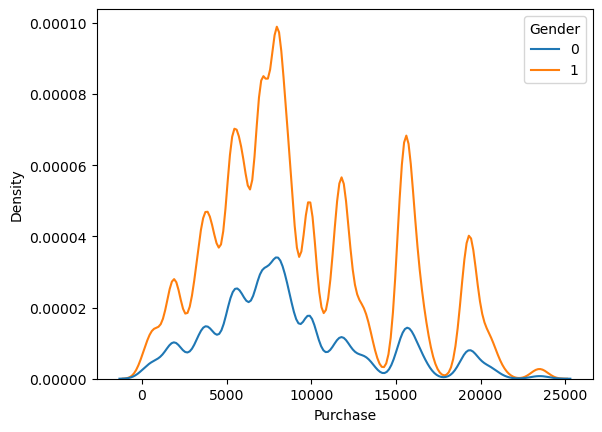

In [17]:
#KDE plot of Purchase column w.r.t. Gender Column


sns.kdeplot(data=df, x=df.Purchase,hue='Gender')

<Axes: xlabel='Purchase', ylabel='Density'>

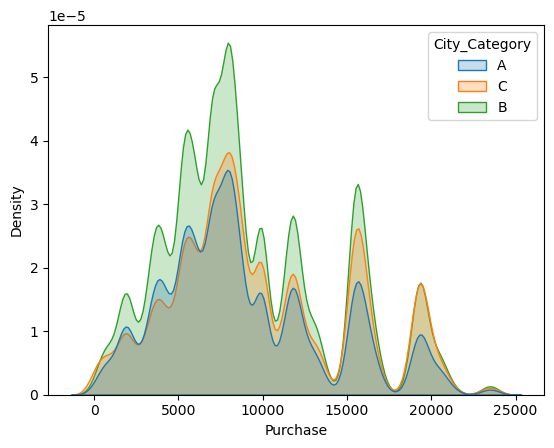

In [18]:
#KDE plot of Purchase column w.r.t. City Column

sns.kdeplot(data=df, x=df.Purchase,hue='City_Category',fill= True)


<Axes: xlabel='Purchase', ylabel='Density'>

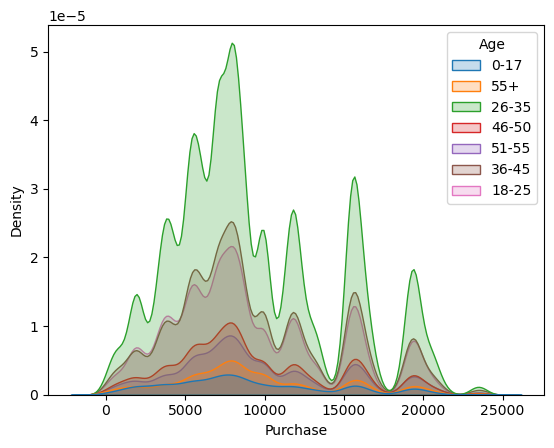

In [19]:
#KDE plot of Purchase column w.r.t. City Column

sns.kdeplot(data=df, x=df.Purchase,hue='Age',fill= True)

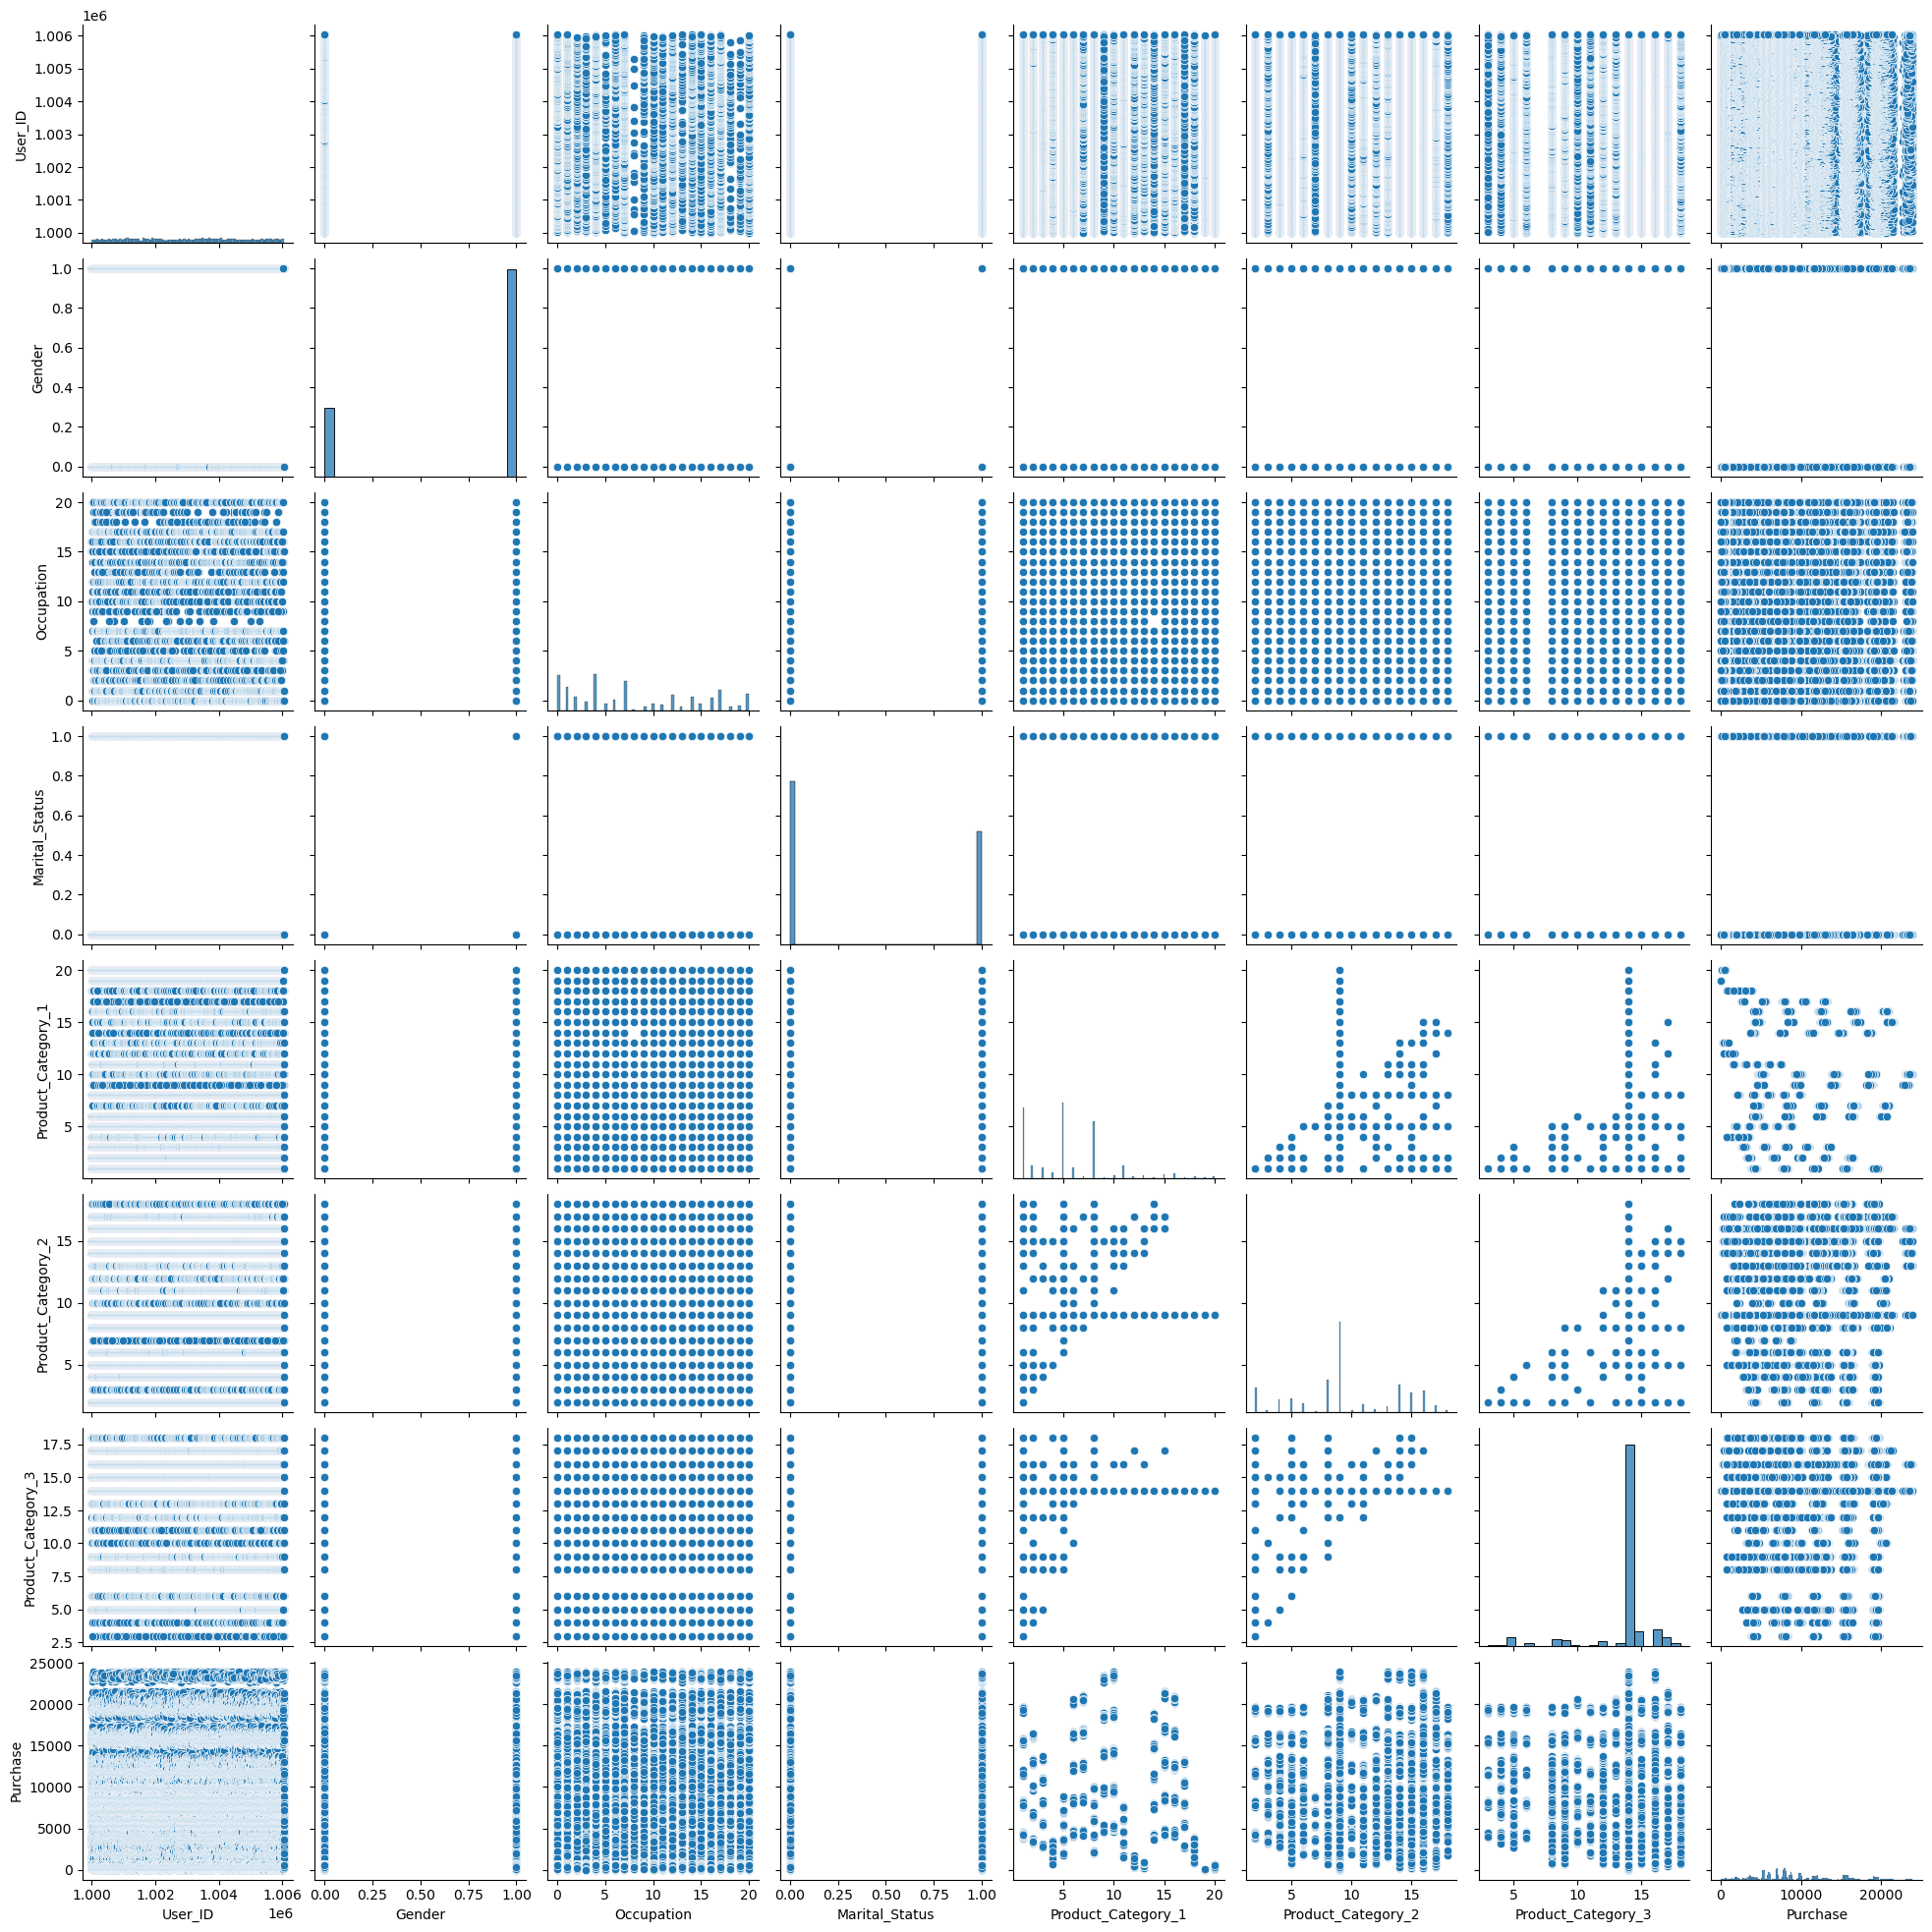

In [20]:
# Pair plot 

sns.pairplot(df)

<Axes: >

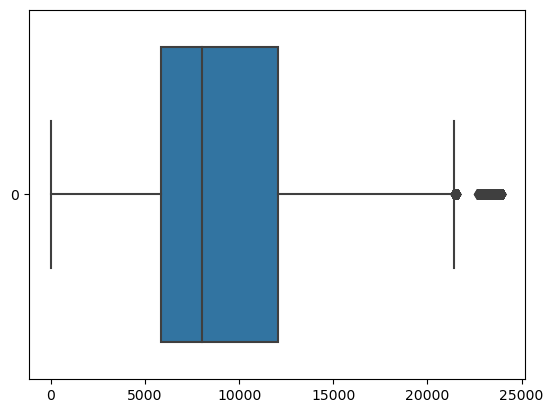

In [21]:
# Checking for Outlier with Boxplot

sns.boxplot(df.Purchase,orient='h')



{'whiskers': [<matplotlib.lines.Line2D at 0x23ead366690>,
 'caps': [<matplotlib.lines.Line2D at 0x23eb79eb190>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ead1ab4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23ead370990>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ead371210>],
 'means': []}

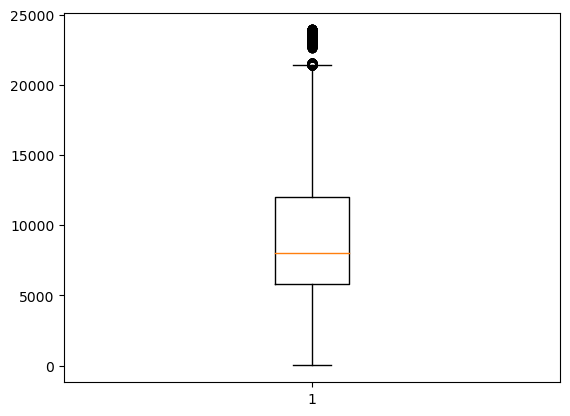

In [22]:
plt.boxplot(df.Purchase)

In [23]:
#Finding IQR 

Q1,Q3 = df.Purchase.quantile([.25,.75])

In [24]:
Q1,Q3

(5823.0, 12054.0)

In [25]:
IQR = Q3 - Q1

In [26]:
IQR

6231.0

In [27]:
UL = Q3 + 1.5*(IQR)
LL = Q1 + 1.5*(IQR)

In [28]:
UL

21400.5

In [29]:
LL

15169.5

In [30]:
df[df.Purchase>UL]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
343,1000058,P00117642,1,26-35,2,B,3,0,10,16.0,14.0,23603
375,1000062,P00119342,0,36-45,3,A,1,0,10,13.0,14.0,23792
652,1000126,P00087042,1,18-25,9,B,1,0,10,14.0,16.0,23233
736,1000139,P00159542,0,26-35,20,C,2,0,10,15.0,16.0,23595
1041,1000175,P00052842,0,26-35,2,B,1,0,10,15.0,14.0,23341
...,...,...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,1,26-35,20,B,1,0,10,13.0,16.0,23753
544704,1005847,P00085342,0,18-25,4,B,2,0,10,13.0,14.0,23724
544743,1005852,P00202242,0,26-35,1,A,0,1,10,16.0,14.0,23529
545663,1006002,P00116142,1,51-55,0,C,1,1,10,13.0,16.0,23663


In [31]:
df.Purchase = np.where(df.Purchase>UL,UL,df.Purchase)

<Axes: >

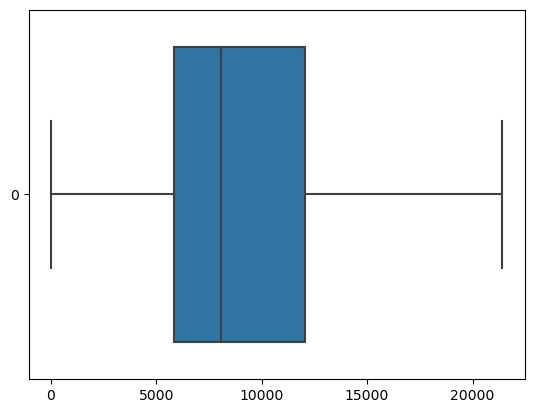

In [32]:
sns.boxplot(df.Purchase,orient='h')

<Axes: xlabel='Product_Category_2', ylabel='count'>

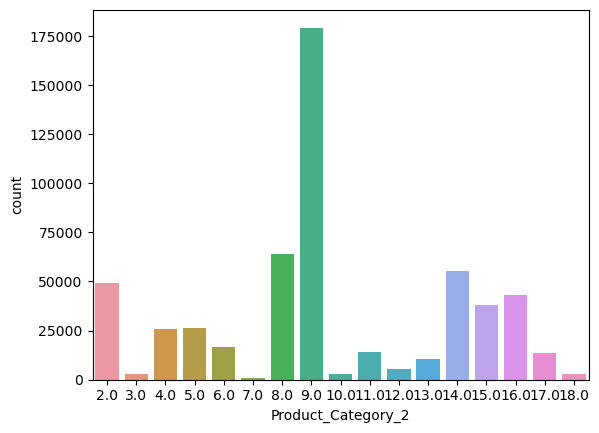

In [33]:
#Countplot of Product_Category_2
sns.countplot(x=df.Product_Category_2)

<Axes: xlabel='Product_Category_3', ylabel='count'>

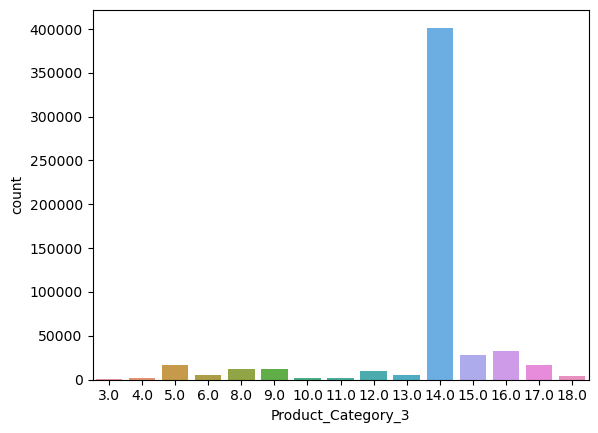

In [34]:
#Countplot of Product_Category_3
sns.countplot(x=df.Product_Category_3)

([<matplotlib.patches.Wedge at 0x23ead48efd0>,
 [Text(0.34254781550769436, 1.0453042590991901, '26-35'),
  Text(-1.0999860751865844, 0.005534834741354073, '36-45'),
  Text(-0.406302589631829, -1.0222124073099825, '18-25'),
  Text(0.48031423239356413, -0.9895949869316141, '46-50'),
  Text(0.8836014705420766, -0.655170543641791, '51-55'),
  Text(1.0523803112495336, -0.32014946586607823, '55+'),
  Text(1.0959108835259952, -0.09475935504884372, '0-17')],
 [Text(0.1868442630041969, 0.5701659595086491, '39.9%'),
  Text(-0.5999924046472278, 0.0030190007680113125, '20.0%'),
  Text(-0.221619594344634, -0.5575704039872632, '18.1%'),
  Text(0.2619895813055804, -0.5397790837808804, '8.3%'),
  Text(0.48196443847749626, -0.3573657510773405, '7.0%'),
  Text(0.5740256243179273, -0.17462698138149718, '3.9%'),
  Text(0.597769572832361, -0.05168692093573293, '2.7%')])

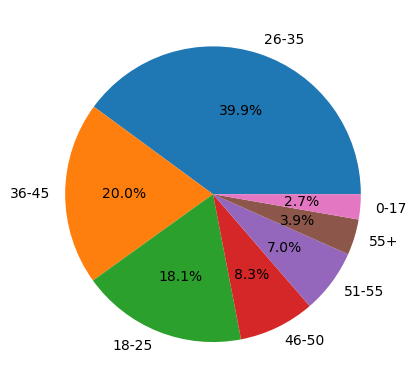

In [35]:
plt.pie(df.Age.value_counts(),labels=df.Age.value_counts().index,autopct='%1.1f%%')

Text(0.5, 1.0, 'Purchase w.r.t Age')

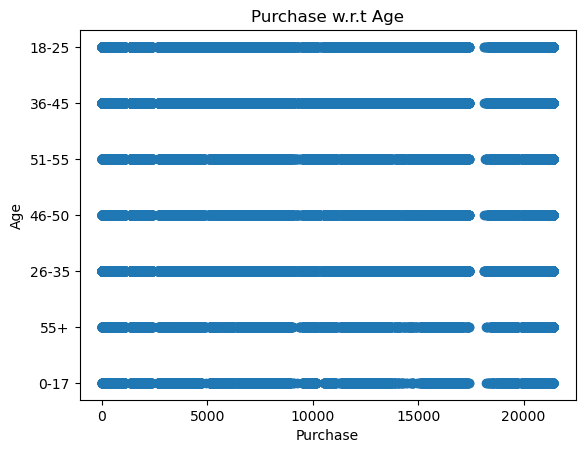

In [36]:
#crete scatter with Black Friday
plt.scatter(x=df.Purchase,y=df.Age)
plt.xlabel('Purchase')
plt.ylabel('Age')
plt.title('Purchase w.r.t Age')

<Axes: xlabel='Purchase', ylabel='Count'>

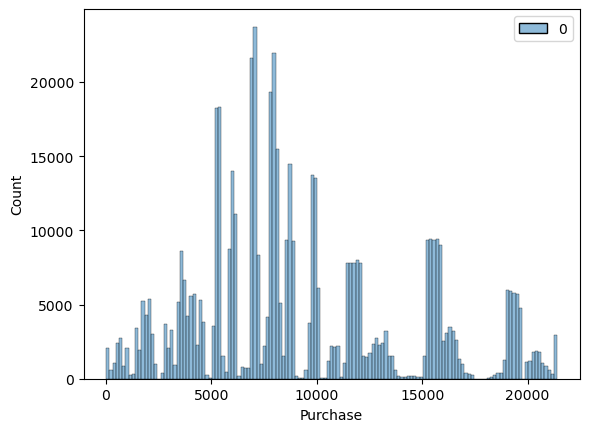

In [37]:
#Histogrampkot on the basis of Purchase and Female(0)

sns.histplot(x=df.Purchase,hue=0)

<Axes: xlabel='Marital_Status', ylabel='Product_Category_3'>

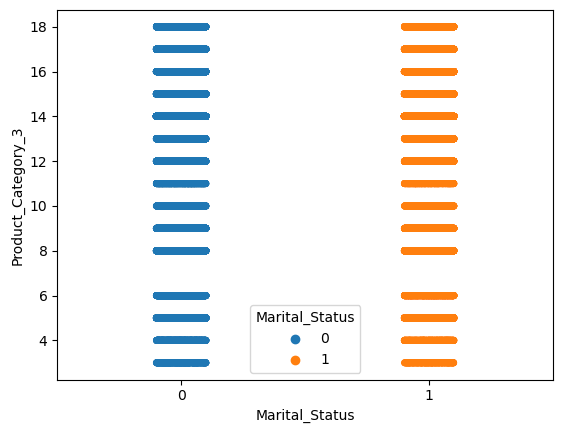

In [38]:
 #Strip plot in Seaborn

sns.stripplot(x=df.Marital_Status,y=df.Product_Category_3,hue=df.Marital_Status)

<Axes: xlabel='Purchase', ylabel='Density'>

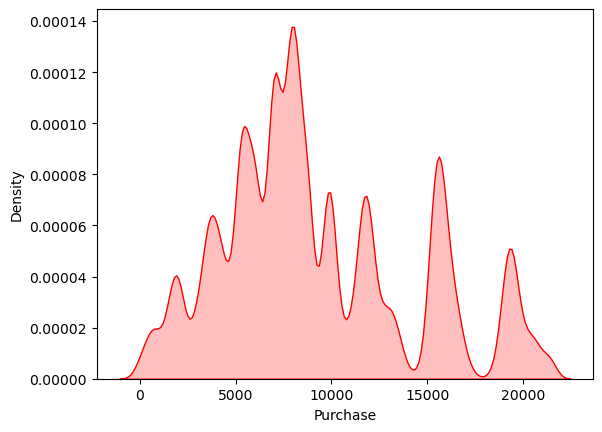

In [39]:
#if we want curves only we use KDE 

sns.kdeplot(df.Purchase,fill=True,color='r')

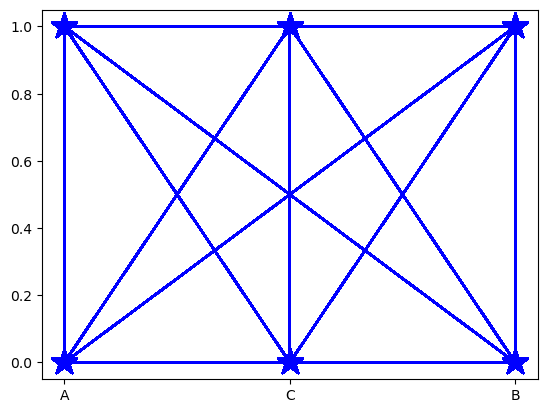

In [53]:
#matplotlib 


plt.plot(df.City_Category,df.Marital_Status,marker='*',ms=20,color='b')

This Data Visualization represent the Black Friday Sale according to the age,Status and Product categories.
Where we can Compare our data accordingly like comparisson between Product category and Age or Purchase according to marital status.
Hence we can Analyse here how to increase the sale.
What kind of Product preffer according to the age.And which Product required according to the city.